## Main Objective is To find the relationship between car prices and body style, size and engine specs & To Find Do Body Style, Size and Engine Specs determine car prices? 


In [308]:
import seaborn as sns
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [309]:
host = r'127.0.0.1' # denotes that the db in a local installation
db = r'MSDS610' # db we just created
user = r'postgres' # using the postgres user for this demo
pw = r'postgres' # this is the password established during installation
port = r'5432' # default port estabalished during install

In [310]:
db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

In [311]:
table_name = r'cars_cleaned'
schema = r'cleaned' # schema where the cleaned data was loaded last week.

df = pd.read_sql_table(table_name, db_conn, schema)

In [312]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,nlimpute,num_doors,num_cylinders,engine_size_cc,power2weight_ratio
0,2,164.0,audi,gas,std,four,sedan,Front Wheel Drive,front,99.8,...,102,5500,24,30,13950.0,audi,4,4,1786,0.043646
1,2,164.0,audi,gas,std,four,sedan,Four Wheel Drive,front,99.4,...,115,5500,18,22,17450.0,audi,4,5,2228,0.040722
2,2,161.0,audi,gas,std,two,sedan,Front Wheel Drive,front,99.8,...,110,5500,19,25,15250.0,audi,2,5,2228,0.043877
3,1,158.0,audi,gas,std,four,sedan,Front Wheel Drive,front,105.8,...,110,5500,19,25,17710.0,audi,4,5,2228,0.038678
4,1,161.0,audi,gas,std,four,wagon,Front Wheel Drive,front,105.8,...,110,5500,19,25,18920.0,audi,4,5,2228,0.037238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,-1,95.0,volvo,gas,std,four,sedan,Rear Wheel Drive,front,109.1,...,114,5400,23,28,16845.0,None,4,4,2310,0.038618
179,-1,95.0,volvo,gas,turbo,four,sedan,Rear Wheel Drive,front,109.1,...,160,5300,19,25,19045.0,None,4,4,2310,0.052476
180,-1,95.0,volvo,gas,std,four,sedan,Rear Wheel Drive,front,109.1,...,134,5500,18,23,21485.0,None,4,6,2834,0.044489
181,-1,95.0,volvo,diesel,turbo,four,sedan,Rear Wheel Drive,front,109.1,...,106,4800,26,27,22470.0,None,4,6,2376,0.032950


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symboling           183 non-null    int64  
 1   normalized-losses   183 non-null    float64
 2   make                183 non-null    object 
 3   fuel-type           183 non-null    object 
 4   aspiration          183 non-null    object 
 5   num-of-doors        183 non-null    object 
 6   body-style          183 non-null    object 
 7   drive-wheels        183 non-null    object 
 8   engine-location     183 non-null    object 
 9   wheel-base          183 non-null    float64
 10  length              183 non-null    float64
 11  width               183 non-null    float64
 12  height              183 non-null    float64
 13  curb-weight         183 non-null    int64  
 14  engine-type         183 non-null    object 
 15  num-of-cylinders    183 non-null    object 
 16  engine-s

## Analytical Questions
* How does the power-to-weight ratio affect car pricing?
* What impact does engine power density have on car pricing?
* How does fuel efficiency influence car pricing?
* Does vehicle volume correlate with car price?
* What role does the performance index play in determining car price?
* Do these engineered features improve car price prediction in a machine learning model?

In [314]:
df.drop(columns=['nlimpute'], inplace=True)

Dropping nlimpute column because it was used to impute the missing values of 'normalized-losses' during cleaning process.

In [315]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,num_doors,num_cylinders,engine_size_cc,power2weight_ratio
0,2,164.0,audi,gas,std,four,sedan,Front Wheel Drive,front,99.8,...,10.0,102,5500,24,30,13950.0,4,4,1786,0.043646
1,2,164.0,audi,gas,std,four,sedan,Four Wheel Drive,front,99.4,...,8.0,115,5500,18,22,17450.0,4,5,2228,0.040722
2,2,161.0,audi,gas,std,two,sedan,Front Wheel Drive,front,99.8,...,8.5,110,5500,19,25,15250.0,2,5,2228,0.043877
3,1,158.0,audi,gas,std,four,sedan,Front Wheel Drive,front,105.8,...,8.5,110,5500,19,25,17710.0,4,5,2228,0.038678
4,1,161.0,audi,gas,std,four,wagon,Front Wheel Drive,front,105.8,...,8.5,110,5500,19,25,18920.0,4,5,2228,0.037238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,-1,95.0,volvo,gas,std,four,sedan,Rear Wheel Drive,front,109.1,...,9.5,114,5400,23,28,16845.0,4,4,2310,0.038618
179,-1,95.0,volvo,gas,turbo,four,sedan,Rear Wheel Drive,front,109.1,...,8.7,160,5300,19,25,19045.0,4,4,2310,0.052476
180,-1,95.0,volvo,gas,std,four,sedan,Rear Wheel Drive,front,109.1,...,8.8,134,5500,18,23,21485.0,4,6,2834,0.044489
181,-1,95.0,volvo,diesel,turbo,four,sedan,Rear Wheel Drive,front,109.1,...,23.0,106,4800,26,27,22470.0,4,6,2376,0.032950


In [316]:
cars = df

In [317]:
x=cars.groupby(by='engine-type')['engine-type'].count().reset_index(name='count').sort_values('count', ascending=False).reset_index(drop=True)
cars.loc[cars['engine-type']=='l', 'engine-type'] = x.iloc[0,0]

Finds the most common 'engine-type' in cars
Replaces all occurrences of 'l' in 'engine-type' with this most common type

In [318]:
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,num_doors,num_cylinders,engine_size_cc,power2weight_ratio
0,2,164.0,audi,gas,std,four,sedan,Front Wheel Drive,front,99.8,...,10.0,102,5500,24,30,13950.0,4,4,1786,0.043646
1,2,164.0,audi,gas,std,four,sedan,Four Wheel Drive,front,99.4,...,8.0,115,5500,18,22,17450.0,4,5,2228,0.040722
2,2,161.0,audi,gas,std,two,sedan,Front Wheel Drive,front,99.8,...,8.5,110,5500,19,25,15250.0,2,5,2228,0.043877
3,1,158.0,audi,gas,std,four,sedan,Front Wheel Drive,front,105.8,...,8.5,110,5500,19,25,17710.0,4,5,2228,0.038678
4,1,161.0,audi,gas,std,four,wagon,Front Wheel Drive,front,105.8,...,8.5,110,5500,19,25,18920.0,4,5,2228,0.037238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,-1,95.0,volvo,gas,std,four,sedan,Rear Wheel Drive,front,109.1,...,9.5,114,5400,23,28,16845.0,4,4,2310,0.038618
179,-1,95.0,volvo,gas,turbo,four,sedan,Rear Wheel Drive,front,109.1,...,8.7,160,5300,19,25,19045.0,4,4,2310,0.052476
180,-1,95.0,volvo,gas,std,four,sedan,Rear Wheel Drive,front,109.1,...,8.8,134,5500,18,23,21485.0,4,6,2834,0.044489
181,-1,95.0,volvo,diesel,turbo,four,sedan,Rear Wheel Drive,front,109.1,...,23.0,106,4800,26,27,22470.0,4,6,2376,0.032950


In [319]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symboling           183 non-null    int64  
 1   normalized-losses   183 non-null    float64
 2   make                183 non-null    object 
 3   fuel-type           183 non-null    object 
 4   aspiration          183 non-null    object 
 5   num-of-doors        183 non-null    object 
 6   body-style          183 non-null    object 
 7   drive-wheels        183 non-null    object 
 8   engine-location     183 non-null    object 
 9   wheel-base          183 non-null    float64
 10  length              183 non-null    float64
 11  width               183 non-null    float64
 12  height              183 non-null    float64
 13  curb-weight         183 non-null    int64  
 14  engine-type         183 non-null    object 
 15  num-of-cylinders    183 non-null    object 
 16  engine-s

# Feature Engineering

### For the information power2weight_ratio is also a derived feature from the original dataset & I had derived this feature in previous assisgnment

* **Power-to-Weight Ratio:** This feature measures how much power the car's engine has relative to its weight. It can help identify how performance might influence car prices, as high-performance vehicles (with higher power-to-weight ratios) may be priced higher.

* **Vehicle Volume:** The size of the car in terms of its volume can be a significant factor in pricing. Larger vehicles often have higher prices due to more space, materials, and luxury factors involved, making this feature important for price determination.

* **Engine Power Density:** This feature represents the amount of engine power per unit of engine size (e.g., liters or cc). Cars with higher engine power density may be more powerful and thus more expensive due to advanced engineering or higher performance, so it could be a key determinant in pricing.

* **Fuel Efficiency:** Fuel efficiency (such as the miles per gallon) can impact the car’s price, especially as fuel-efficient models are often more desirable due to lower operating costs. This feature can highlight trends related to consumer preferences for economical vehicles and their pricing.

* **Performance Index:** A composite metric like this likely combines various performance-related features (e.g., horsepower, torque, acceleration). Since performance is a major factor in car pricing, this feature can reveal how performance correlates with car prices and help establish a clear relationship.

* **Engine Performance:** This feature directly quantifies the power output and capabilities of the engine, which is typically a direct contributor to a car’s value. Stronger engines tend to be associated with higher-end, more expensive cars, making this a critical feature for price prediction.

In [320]:
# 1. Vehicle Volume (Overall size of the car)
cars['vehicle_volume'] = cars['length'] * cars['width'] * cars['height']

In [321]:
# 2. Engine Power Density (Power per engine size)
cars['engine_power_density'] = cars['horsepower'] / cars['engine-size']

In [322]:
# 3. Fuel Efficiency Ratio (Average MPG)
cars['fuel_efficiency'] = (cars['city-mpg'] + cars['highway-mpg']) / 2

In [323]:
# 4. Performance Index (Power, RPM, and weight factor)
cars['performance_index'] = (cars['horsepower'] * cars['peak-rpm'].astype(float)) / cars['curb-weight']

In [324]:
# 5. Engine Performance Score (Compression & Cylinders impact)
cars['engine_performance'] = (cars['horsepower'] * cars['compression-ratio']) / cars['num_cylinders']

In [325]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             183 non-null    int64  
 1   normalized-losses     183 non-null    float64
 2   make                  183 non-null    object 
 3   fuel-type             183 non-null    object 
 4   aspiration            183 non-null    object 
 5   num-of-doors          183 non-null    object 
 6   body-style            183 non-null    object 
 7   drive-wheels          183 non-null    object 
 8   engine-location       183 non-null    object 
 9   wheel-base            183 non-null    float64
 10  length                183 non-null    float64
 11  width                 183 non-null    float64
 12  height                183 non-null    float64
 13  curb-weight           183 non-null    int64  
 14  engine-type           183 non-null    object 
 15  num-of-cylinders      1

In [326]:
categorical_columns = cars.select_dtypes(include=['object']).columns
categorical_columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system', 'bore', 'stroke', 'peak-rpm'],
      dtype='object')

Performing Label encoding to convert object to integer data type

In [327]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    cars[col] = le.fit_transform(cars[col])
    label_encoders[col] = le

In [328]:
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,price,num_doors,num_cylinders,engine_size_cc,power2weight_ratio,vehicle_volume,engine_power_density,fuel_efficiency,performance_index,engine_performance
0,2,164.0,0,1,0,0,3,1,0,99.8,...,13950.0,4,4,1786,0.043646,634816.956,0.935780,27.0,240.051348,255.000000
1,2,164.0,0,1,0,0,3,0,0,99.4,...,17450.0,4,5,2228,0.040722,636734.832,0.845588,20.0,223.973088,184.000000
2,2,161.0,0,1,0,1,3,1,0,99.8,...,15250.0,2,5,2228,0.043877,624189.969,0.808824,22.0,241.324292,187.000000
3,1,158.0,0,1,0,0,3,1,0,105.8,...,17710.0,4,5,2228,0.038678,766364.046,0.808824,22.0,212.728551,187.000000
4,1,161.0,0,1,0,0,4,1,0,105.8,...,18920.0,4,5,2228,0.037238,766364.046,0.808824,22.0,204.807041,187.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,-1,95.0,17,1,0,0,3,2,0,109.1,...,16845.0,4,4,2310,0.038618,721961.760,0.808511,25.5,208.536585,270.750000
179,-1,95.0,17,1,1,0,3,2,0,109.1,...,19045.0,4,4,2310,0.052476,720913.920,1.134752,22.0,278.123975,348.000000
180,-1,95.0,17,1,0,0,3,2,0,109.1,...,21485.0,4,6,2834,0.044489,721961.760,0.774566,20.5,244.687915,196.533333
181,-1,95.0,17,0,1,0,3,2,0,109.1,...,22470.0,4,6,2376,0.032950,721961.760,0.731034,26.5,158.159776,406.333333


In [329]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             183 non-null    int64  
 1   normalized-losses     183 non-null    float64
 2   make                  183 non-null    int32  
 3   fuel-type             183 non-null    int32  
 4   aspiration            183 non-null    int32  
 5   num-of-doors          183 non-null    int32  
 6   body-style            183 non-null    int32  
 7   drive-wheels          183 non-null    int32  
 8   engine-location       183 non-null    int32  
 9   wheel-base            183 non-null    float64
 10  length                183 non-null    float64
 11  width                 183 non-null    float64
 12  height                183 non-null    float64
 13  curb-weight           183 non-null    int64  
 14  engine-type           183 non-null    int32  
 15  num-of-cylinders      1

In [330]:
categorical_columns = cars.select_dtypes(include=['object']).columns
categorical_columns

Index([], dtype='object')

In [331]:
cars_copy = cars.copy()

In [332]:
#cars_copy = cars_copy.astype(float, errors='ignore')

In [333]:
cars_copy.columns = [str(col) for col in cars_copy.columns]

No more object column

In [334]:
# Splitting the dataset
X = cars_copy.drop(columns=['price'])  # Dropping one-hot target columns
y = cars_copy['price']  # Binary classification for example purposes

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [336]:
# Train a model and analyze feature importance
clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Feature Importance
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

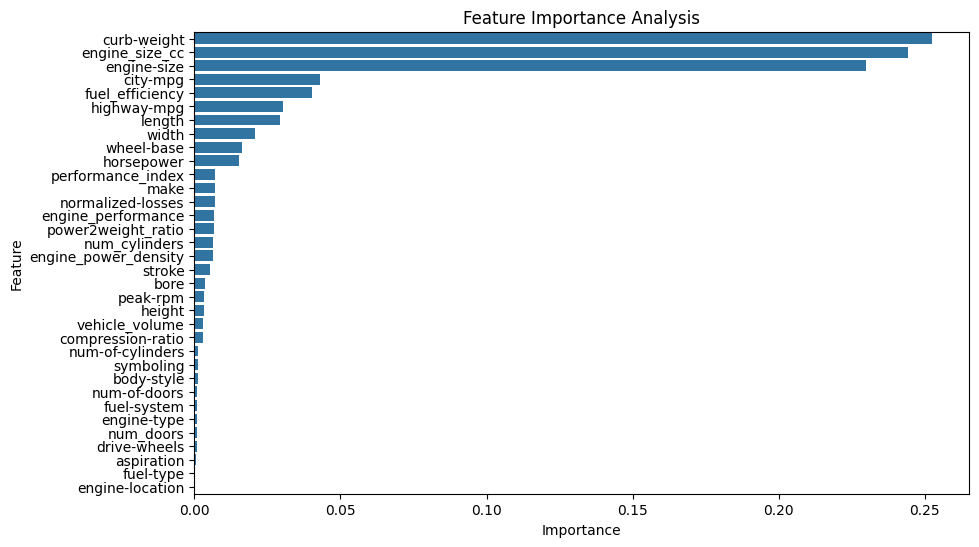

In [337]:
# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance Analysis")
plt.show()

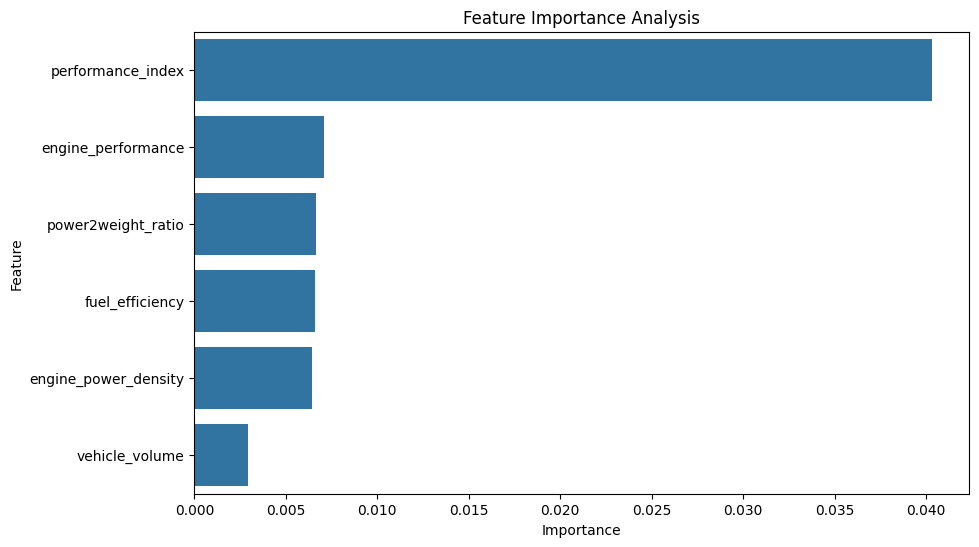

In [338]:
# Feature Importance
importances = clf.feature_importances_
importances = importances[28:]
feature_names = ['fuel_efficiency', 'vehicle_volume', 'engine_power_density', 'performance_index', 'engine_performance','power2weight_ratio']
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance Analysis")
plt.show()

The generated feature are listed in descending order according to their importance : 
* 'performance_index'
* 'engine_performance'
* 'power2weight_ratio'
* 'fuel_efficiency'
* 'engine_power_density'
* 'vehicle_volume'

**Second Method to find feature importance using correlation matrix**

In [339]:
correlation_matrix = cars_copy.corr()
columns_of_interest = ['fuel_efficiency', 'vehicle_volume', 'engine_power_density', 'performance_index', 'engine_performance', 'power2weight_ratio']

# Extracting correlation values for the specified column ('price') and sorting them in descending order
correlation_values = correlation_matrix['price'][columns_of_interest].sort_values(ascending=True)

# Printing the sorted values
print(correlation_values)
# print(correlation_matrix['price'].sort_values(ascending=False))

fuel_efficiency        -0.711256
engine_power_density    0.111878
performance_index       0.260767
power2weight_ratio      0.405631
engine_performance      0.408579
vehicle_volume          0.729222
Name: price, dtype: float64


| Feature               | Correlation with Price |
|-----------------------|------------------------|
| vehicle_volume         | 0.729222               |
| fuel_efficiency        | -0.711256              |
| engine_performance     | 0.408579               |
| power2weight_ratio     | 0.405631               |
| performance_index      | 0.260767               |
| engine_power_density   | 0.111878               |


**Summary**

The goal of this analysis was to understand how different car features, like size, engine power, and fuel efficiency, affect the car’s price. The study asked important questions, such as whether a car's power-to-weight ratio (how powerful the engine is compared to the car’s weight), engine power density (how much power the engine produces for its size), fuel efficiency (how far a car can go on a certain amount of fuel), and vehicle size (how big or small the car is) impact its price. Another key question was whether creating a performance index—a number that combines different car features and helps in predicting car prices better.

To find the answers, new features were created using the existing data. Some features, like the power-to-weight ratio, were already calculated in past work, while others, like the performance index, were introduced in this study. Some unnecessary data, like a column used to fill in missing values, was removed to make the analysis cleaner and more accurate.

The results showed that some of these new features were very helpful in explaining why some cars are more expensive than others. For example, the power-to-weight ratio and performance index were closely linked to car prices, meaning faster and more powerful cars tend to be pricier. Fuel_efficiency and engine_power_density also had an effect but were not as strongly connected to price.

However, there were some concerns. Some features were very similar to each other, which could lead to confusion in the model, making it harder to get accurate predictions. This is called redundancy.We can handle by removing unnecesary features

In the end, the study showed that adding these new features helped improve car price predictions, but careful selection is needed to avoid mistakes like using too much similar information.